In [1]:
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [2]:
inputs = np.random.rand(100)*100-50
outputs = 5*(inputs**3) - 12*(inputs**2) - 4*inputs + 15 + np.random.rand(100)
outputs = (outputs-np.mean(outputs))/np.std(outputs)

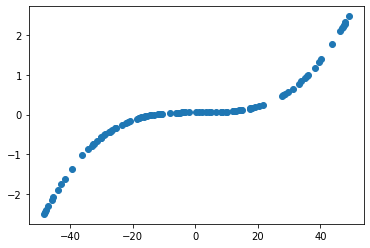

In [3]:
plt.scatter(inputs, outputs)
plt.show()

In [4]:
class RandDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        
    def __len__(self):
        return len(self.inputs)
        
    def __getitem__(self, idx):
        return torch.tensor([self.inputs[idx]]).type(torch.float), torch.tensor(self.outputs[idx]).type(torch.float)

In [5]:
ds = RandDataset(inputs, outputs)
dl = DataLoader(ds, batch_size=32, shuffle=True)

In [6]:
def train_one_epoch(dataloader, model):
    loss_fn = nn.MSELoss(reduction='sum')
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
    
    size = len(dataloader.dataset)
    loss_now = 0
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred.reshape(-1), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss = loss.item()
        loss_now += loss
        loss_check = loss_now/(batch*32+len(X))
        print(f"loss: {loss_check:>7f}  [{batch*32+len(X):>5d}/{size:>5d}]")

def train(dl, model, epochs):
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_one_epoch(dl, model)
    print("Done!")

In [7]:
epochs = 500

In [8]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(1, 4),
            nn.Linear(4, 8),
            nn.Linear(8, 4),
            nn.Linear(4, 1),
        )
        
    def forward(self, X):
        return self.linear_stack(X)
    
linear_model = LinearModel()
train(dl, linear_model, epochs)

Epoch 1
-------------------------------
loss: 0.246743  [   32/  100]
loss: 0.417644  [   64/  100]
loss: 0.361022  [   96/  100]
loss: 0.354220  [  100/  100]
Epoch 2
-------------------------------
loss: 0.308126  [   32/  100]
loss: 0.235086  [   64/  100]
loss: 0.309624  [   96/  100]
loss: 0.317818  [  100/  100]
Epoch 3
-------------------------------
loss: 0.179590  [   32/  100]
loss: 0.204958  [   64/  100]
loss: 0.220379  [   96/  100]
loss: 0.217578  [  100/  100]
Epoch 4
-------------------------------
loss: 0.287502  [   32/  100]
loss: 0.222224  [   64/  100]
loss: 0.219306  [   96/  100]
loss: 0.220699  [  100/  100]
Epoch 5
-------------------------------
loss: 0.192902  [   32/  100]
loss: 0.191878  [   64/  100]
loss: 0.204674  [   96/  100]
loss: 0.202773  [  100/  100]
Epoch 6
-------------------------------
loss: 0.281559  [   32/  100]
loss: 0.220353  [   64/  100]
loss: 0.266314  [   96/  100]
loss: 0.265645  [  100/  100]
Epoch 7
-------------------------------


loss: 0.190580  [   96/  100]
loss: 0.187562  [  100/  100]
Epoch 97
-------------------------------
loss: 0.183942  [   32/  100]
loss: 0.181300  [   64/  100]
loss: 0.195136  [   96/  100]
loss: 0.194822  [  100/  100]
Epoch 98
-------------------------------
loss: 0.201731  [   32/  100]
loss: 0.183211  [   64/  100]
loss: 0.182009  [   96/  100]
loss: 0.193572  [  100/  100]
Epoch 99
-------------------------------
loss: 0.183295  [   32/  100]
loss: 0.187900  [   64/  100]
loss: 0.173786  [   96/  100]
loss: 0.183605  [  100/  100]
Epoch 100
-------------------------------
loss: 0.207086  [   32/  100]
loss: 0.196617  [   64/  100]
loss: 0.187758  [   96/  100]
loss: 0.190286  [  100/  100]
Epoch 101
-------------------------------
loss: 0.161680  [   32/  100]
loss: 0.168736  [   64/  100]
loss: 0.177554  [   96/  100]
loss: 0.187696  [  100/  100]
Epoch 102
-------------------------------
loss: 0.182255  [   32/  100]
loss: 0.169651  [   64/  100]
loss: 0.183455  [   96/  100]
l

loss: 0.155340  [   64/  100]
loss: 0.194786  [   96/  100]
loss: 0.202587  [  100/  100]
Epoch 198
-------------------------------
loss: 0.123841  [   32/  100]
loss: 0.185695  [   64/  100]
loss: 0.204167  [   96/  100]
loss: 0.200374  [  100/  100]
Epoch 199
-------------------------------
loss: 0.189730  [   32/  100]
loss: 0.185332  [   64/  100]
loss: 0.188353  [   96/  100]
loss: 0.187300  [  100/  100]
Epoch 200
-------------------------------
loss: 0.191574  [   32/  100]
loss: 0.175825  [   64/  100]
loss: 0.183611  [   96/  100]
loss: 0.184235  [  100/  100]
Epoch 201
-------------------------------
loss: 0.156222  [   32/  100]
loss: 0.179164  [   64/  100]
loss: 0.185376  [   96/  100]
loss: 0.190126  [  100/  100]
Epoch 202
-------------------------------
loss: 0.168565  [   32/  100]
loss: 0.162000  [   64/  100]
loss: 0.177186  [   96/  100]
loss: 0.182429  [  100/  100]
Epoch 203
-------------------------------
loss: 0.141984  [   32/  100]
loss: 0.178558  [   64/  100

loss: 0.193663  [   32/  100]
loss: 0.170033  [   64/  100]
loss: 0.184346  [   96/  100]
loss: 0.181982  [  100/  100]
Epoch 249
-------------------------------
loss: 0.186316  [   32/  100]
loss: 0.200169  [   64/  100]
loss: 0.187344  [   96/  100]
loss: 0.184608  [  100/  100]
Epoch 250
-------------------------------
loss: 0.140640  [   32/  100]
loss: 0.184992  [   64/  100]
loss: 0.194561  [   96/  100]
loss: 0.191376  [  100/  100]
Epoch 251
-------------------------------
loss: 0.213036  [   32/  100]
loss: 0.213205  [   64/  100]
loss: 0.190959  [   96/  100]
loss: 0.187105  [  100/  100]
Epoch 252
-------------------------------
loss: 0.158410  [   32/  100]
loss: 0.157613  [   64/  100]
loss: 0.185983  [   96/  100]
loss: 0.185831  [  100/  100]
Epoch 253
-------------------------------
loss: 0.191411  [   32/  100]
loss: 0.183436  [   64/  100]
loss: 0.187259  [   96/  100]
loss: 0.187382  [  100/  100]
Epoch 254
-------------------------------
loss: 0.109279  [   32/  100

Epoch 346
-------------------------------
loss: 0.233035  [   32/  100]
loss: 0.212687  [   64/  100]
loss: 0.197194  [   96/  100]
loss: 0.191230  [  100/  100]
Epoch 347
-------------------------------
loss: 0.159379  [   32/  100]
loss: 0.211050  [   64/  100]
loss: 0.191704  [   96/  100]
loss: 0.187036  [  100/  100]
Epoch 348
-------------------------------
loss: 0.177900  [   32/  100]
loss: 0.191803  [   64/  100]
loss: 0.188087  [   96/  100]
loss: 0.182724  [  100/  100]
Epoch 349
-------------------------------
loss: 0.214624  [   32/  100]
loss: 0.202879  [   64/  100]
loss: 0.190425  [   96/  100]
loss: 0.189520  [  100/  100]
Epoch 350
-------------------------------
loss: 0.188676  [   32/  100]
loss: 0.180843  [   64/  100]
loss: 0.182685  [   96/  100]
loss: 0.181612  [  100/  100]
Epoch 351
-------------------------------
loss: 0.188774  [   32/  100]
loss: 0.190463  [   64/  100]
loss: 0.190575  [   96/  100]
loss: 0.193807  [  100/  100]
Epoch 352
------------------

loss: 0.179920  [  100/  100]
Epoch 442
-------------------------------
loss: 0.185773  [   32/  100]
loss: 0.183201  [   64/  100]
loss: 0.180553  [   96/  100]
loss: 0.180145  [  100/  100]
Epoch 443
-------------------------------
loss: 0.221715  [   32/  100]
loss: 0.194758  [   64/  100]
loss: 0.182686  [   96/  100]
loss: 0.185095  [  100/  100]
Epoch 444
-------------------------------
loss: 0.135026  [   32/  100]
loss: 0.167407  [   64/  100]
loss: 0.182733  [   96/  100]
loss: 0.184690  [  100/  100]
Epoch 445
-------------------------------
loss: 0.214789  [   32/  100]
loss: 0.201683  [   64/  100]
loss: 0.185452  [   96/  100]
loss: 0.182370  [  100/  100]
Epoch 446
-------------------------------
loss: 0.258515  [   32/  100]
loss: 0.202147  [   64/  100]
loss: 0.191385  [   96/  100]
loss: 0.188662  [  100/  100]
Epoch 447
-------------------------------
loss: 0.201594  [   32/  100]
loss: 0.190169  [   64/  100]
loss: 0.187656  [   96/  100]
loss: 0.186626  [  100/  100

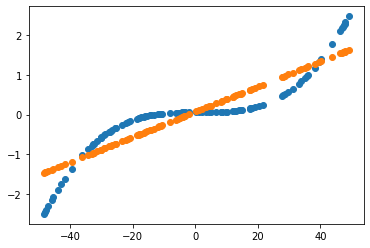

In [9]:
origin_X = []
preds = []
for X, y in dl:
    origin_X.extend(X.reshape(-1).tolist())
    pred = linear_model(X).reshape(-1).tolist()
    preds.extend(pred)

plt.scatter(inputs, outputs)
plt.scatter(origin_X, preds)
plt.show()

In [10]:
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
        )
        
    def forward(self, X):
        return self.linear_stack(X)
    
non_linear_model = NonLinearModel()
train(dl, non_linear_model, epochs)

Epoch 1
-------------------------------
loss: 1.506386  [   32/  100]
loss: 1.112194  [   64/  100]
loss: 0.907019  [   96/  100]
loss: 0.888269  [  100/  100]
Epoch 2
-------------------------------
loss: 0.427333  [   32/  100]
loss: 0.679953  [   64/  100]
loss: 0.787115  [   96/  100]
loss: 0.793770  [  100/  100]
Epoch 3
-------------------------------
loss: 0.804175  [   32/  100]
loss: 0.700826  [   64/  100]
loss: 0.768486  [   96/  100]
loss: 0.741319  [  100/  100]
Epoch 4
-------------------------------
loss: 0.568680  [   32/  100]
loss: 0.718821  [   64/  100]
loss: 0.683592  [   96/  100]
loss: 0.683789  [  100/  100]
Epoch 5
-------------------------------
loss: 0.633198  [   32/  100]
loss: 0.553500  [   64/  100]
loss: 0.651293  [   96/  100]
loss: 0.633920  [  100/  100]
Epoch 6
-------------------------------
loss: 0.221021  [   32/  100]
loss: 0.461559  [   64/  100]
loss: 0.626700  [   96/  100]
loss: 0.605299  [  100/  100]
Epoch 7
-------------------------------


loss: 0.343864  [  100/  100]
Epoch 60
-------------------------------
loss: 0.483362  [   32/  100]
loss: 0.415079  [   64/  100]
loss: 0.359050  [   96/  100]
loss: 0.357785  [  100/  100]
Epoch 61
-------------------------------
loss: 0.315351  [   32/  100]
loss: 0.386319  [   64/  100]
loss: 0.328347  [   96/  100]
loss: 0.347655  [  100/  100]
Epoch 62
-------------------------------
loss: 0.300084  [   32/  100]
loss: 0.289726  [   64/  100]
loss: 0.333914  [   96/  100]
loss: 0.353952  [  100/  100]
Epoch 63
-------------------------------
loss: 0.414468  [   32/  100]
loss: 0.321213  [   64/  100]
loss: 0.367632  [   96/  100]
loss: 0.362807  [  100/  100]
Epoch 64
-------------------------------
loss: 0.263397  [   32/  100]
loss: 0.423985  [   64/  100]
loss: 0.368001  [   96/  100]
loss: 0.360741  [  100/  100]
Epoch 65
-------------------------------
loss: 0.441764  [   32/  100]
loss: 0.353868  [   64/  100]
loss: 0.366829  [   96/  100]
loss: 0.354845  [  100/  100]
Epoc

loss: 0.319708  [  100/  100]
Epoch 143
-------------------------------
loss: 0.281382  [   32/  100]
loss: 0.276499  [   64/  100]
loss: 0.310967  [   96/  100]
loss: 0.299961  [  100/  100]
Epoch 144
-------------------------------
loss: 0.216911  [   32/  100]
loss: 0.223816  [   64/  100]
loss: 0.332062  [   96/  100]
loss: 0.322531  [  100/  100]
Epoch 145
-------------------------------
loss: 0.398922  [   32/  100]
loss: 0.373844  [   64/  100]
loss: 0.321137  [   96/  100]
loss: 0.309928  [  100/  100]
Epoch 146
-------------------------------
loss: 0.310817  [   32/  100]
loss: 0.376252  [   64/  100]
loss: 0.313939  [   96/  100]
loss: 0.308817  [  100/  100]
Epoch 147
-------------------------------
loss: 0.368487  [   32/  100]
loss: 0.381232  [   64/  100]
loss: 0.323779  [   96/  100]
loss: 0.313911  [  100/  100]
Epoch 148
-------------------------------
loss: 0.297000  [   32/  100]
loss: 0.260938  [   64/  100]
loss: 0.272258  [   96/  100]
loss: 0.310407  [  100/  100

Epoch 202
-------------------------------
loss: 0.040375  [   32/  100]
loss: 0.026223  [   64/  100]
loss: 0.028697  [   96/  100]
loss: 0.028723  [  100/  100]
Epoch 203
-------------------------------
loss: 0.047267  [   32/  100]
loss: 0.046727  [   64/  100]
loss: 0.066416  [   96/  100]
loss: 0.065129  [  100/  100]
Epoch 204
-------------------------------
loss: 0.017509  [   32/  100]
loss: 0.058872  [   64/  100]
loss: 0.042531  [   96/  100]
loss: 0.041563  [  100/  100]
Epoch 205
-------------------------------
loss: 0.088433  [   32/  100]
loss: 0.050991  [   64/  100]
loss: 0.066087  [   96/  100]
loss: 0.063489  [  100/  100]
Epoch 206
-------------------------------
loss: 0.017017  [   32/  100]
loss: 0.040083  [   64/  100]
loss: 0.030575  [   96/  100]
loss: 0.033968  [  100/  100]
Epoch 207
-------------------------------
loss: 0.076340  [   32/  100]
loss: 0.043683  [   64/  100]
loss: 0.037397  [   96/  100]
loss: 0.036135  [  100/  100]
Epoch 208
------------------

loss: 0.041100  [   96/  100]
loss: 0.039475  [  100/  100]
Epoch 284
-------------------------------
loss: 0.007315  [   32/  100]
loss: 0.046097  [   64/  100]
loss: 0.033138  [   96/  100]
loss: 0.032051  [  100/  100]
Epoch 285
-------------------------------
loss: 0.110360  [   32/  100]
loss: 0.058501  [   64/  100]
loss: 0.054224  [   96/  100]
loss: 0.052080  [  100/  100]
Epoch 286
-------------------------------
loss: 0.021821  [   32/  100]
loss: 0.022148  [   64/  100]
loss: 0.027825  [   96/  100]
loss: 0.026769  [  100/  100]
Epoch 287
-------------------------------
loss: 0.036492  [   32/  100]
loss: 0.032914  [   64/  100]
loss: 0.029937  [   96/  100]
loss: 0.031279  [  100/  100]
Epoch 288
-------------------------------
loss: 0.006288  [   32/  100]
loss: 0.024912  [   64/  100]
loss: 0.035477  [   96/  100]
loss: 0.034120  [  100/  100]
Epoch 289
-------------------------------
loss: 0.051089  [   32/  100]
loss: 0.032474  [   64/  100]
loss: 0.038561  [   96/  100

loss: 0.032861  [   96/  100]
loss: 0.032972  [  100/  100]
Epoch 344
-------------------------------
loss: 0.013839  [   32/  100]
loss: 0.023477  [   64/  100]
loss: 0.017261  [   96/  100]
loss: 0.018486  [  100/  100]
Epoch 345
-------------------------------
loss: 0.075859  [   32/  100]
loss: 0.042262  [   64/  100]
loss: 0.050295  [   96/  100]
loss: 0.048402  [  100/  100]
Epoch 346
-------------------------------
loss: 0.032373  [   32/  100]
loss: 0.035158  [   64/  100]
loss: 0.039246  [   96/  100]
loss: 0.039419  [  100/  100]
Epoch 347
-------------------------------
loss: 0.083872  [   32/  100]
loss: 0.044190  [   64/  100]
loss: 0.042327  [   96/  100]
loss: 0.041574  [  100/  100]
Epoch 348
-------------------------------
loss: 0.013246  [   32/  100]
loss: 0.027947  [   64/  100]
loss: 0.034779  [   96/  100]
loss: 0.033940  [  100/  100]
Epoch 349
-------------------------------
loss: 0.036700  [   32/  100]
loss: 0.035678  [   64/  100]
loss: 0.027778  [   96/  100

loss: 0.025564  [   64/  100]
loss: 0.027839  [   96/  100]
loss: 0.026727  [  100/  100]
Epoch 426
-------------------------------
loss: 0.022956  [   32/  100]
loss: 0.025122  [   64/  100]
loss: 0.023669  [   96/  100]
loss: 0.022917  [  100/  100]
Epoch 427
-------------------------------
loss: 0.023374  [   32/  100]
loss: 0.023462  [   64/  100]
loss: 0.027563  [   96/  100]
loss: 0.026816  [  100/  100]
Epoch 428
-------------------------------
loss: 0.009767  [   32/  100]
loss: 0.024508  [   64/  100]
loss: 0.022975  [   96/  100]
loss: 0.022091  [  100/  100]
Epoch 429
-------------------------------
loss: 0.021739  [   32/  100]
loss: 0.014862  [   64/  100]
loss: 0.013580  [   96/  100]
loss: 0.013076  [  100/  100]
Epoch 430
-------------------------------
loss: 0.013998  [   32/  100]
loss: 0.035689  [   64/  100]
loss: 0.027699  [   96/  100]
loss: 0.031958  [  100/  100]
Epoch 431
-------------------------------
loss: 0.074434  [   32/  100]
loss: 0.042700  [   64/  100

Epoch 486
-------------------------------
loss: 0.101913  [   32/  100]
loss: 0.052354  [   64/  100]
loss: 0.045708  [   96/  100]
loss: 0.045495  [  100/  100]
Epoch 487
-------------------------------
loss: 0.100192  [   32/  100]
loss: 0.064634  [   64/  100]
loss: 0.046041  [   96/  100]
loss: 0.045444  [  100/  100]
Epoch 488
-------------------------------
loss: 0.039196  [   32/  100]
loss: 0.024168  [   64/  100]
loss: 0.028264  [   96/  100]
loss: 0.029780  [  100/  100]
Epoch 489
-------------------------------
loss: 0.010969  [   32/  100]
loss: 0.025165  [   64/  100]
loss: 0.018945  [   96/  100]
loss: 0.019120  [  100/  100]
Epoch 490
-------------------------------
loss: 0.019400  [   32/  100]
loss: 0.017981  [   64/  100]
loss: 0.015734  [   96/  100]
loss: 0.015131  [  100/  100]
Epoch 491
-------------------------------
loss: 0.016729  [   32/  100]
loss: 0.024611  [   64/  100]
loss: 0.022110  [   96/  100]
loss: 0.021322  [  100/  100]
Epoch 492
------------------

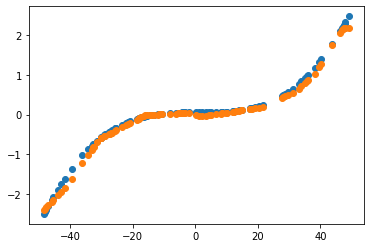

In [11]:
origin_X = []
preds = []
for X, y in dl:
    origin_X.extend(X.reshape(-1).tolist())
    pred = non_linear_model(X).reshape(-1).tolist()
    preds.extend(pred)

plt.scatter(inputs, outputs)
plt.scatter(origin_X, preds)
plt.show()